## 1. 实现灰度化和二值化

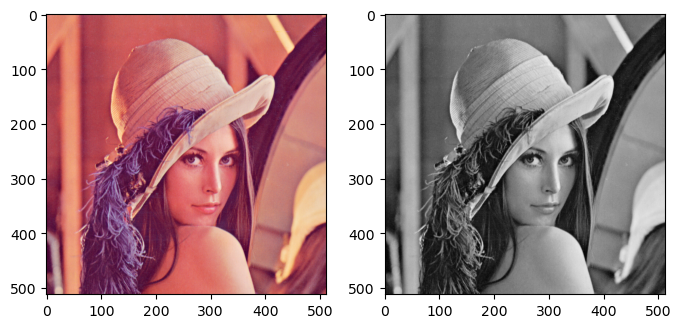

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# load the image
image_ori = cv2.imread("lenna.png")

# convert the image to RGB (OpenCV uses BGR) so we can display it with matplotlib
image = cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.imshow(image)

# convert the image to grayscale
# get the dimensions of the original image
h, w = image.shape[:2]
# create a new image with the same dimensions as the original image
gray_image = np.zeros((h, w), image.dtype)

# convert the image to grayscale
for i in range(h):
    for j in range(w):
        m = image[i, j]
        gray_image[i, j] = int(0.3 * m[0] + 0.59 * m[1] + 0.11 * m[2])

# show the image
plt.subplot(222)
plt.imshow(gray_image, cmap="gray")

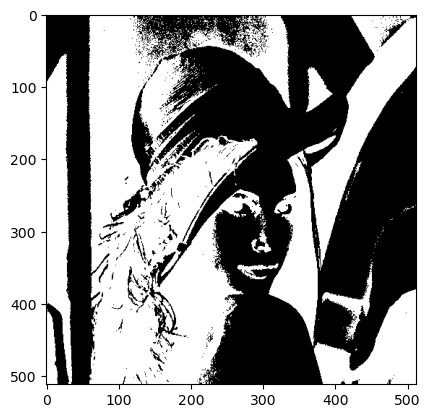

In [2]:
# convert the image to binary

threshold = 255 // 2

image_binary = np.zeros((h, w), image.dtype)

for i in range(h):
    for j in range(w):
        if gray_image[i, j] > threshold:
            image_binary[i, j] = 255
        else:
            image_binary[i, j] = 0

# show the image
plt.imshow(image_binary, cmap="binary")

## 2. 实现最临近插值


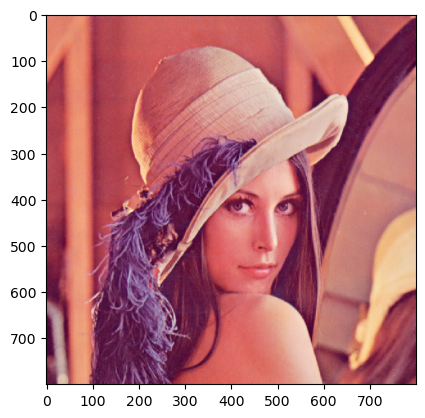

In [3]:
def zoom_function(img, zoom_size):
    h, w, c = img.shape
    new_h, new_w = zoom_size
    new_img = np.zeros((new_h, new_w, c), img.dtype)

    zoom_rate_h = new_h / h
    zoom_rate_w = new_w / w

    for i in range(new_h):
        for j in range(new_w):
            new_img[i, j] = img[int(i/zoom_rate_h + 0.5), int(j/zoom_rate_w + 0.5)]
    
    return new_img

# plt.imshow(image)
# zoom the image
zoom_size = (800, 800)
zoomed_image = zoom_function(image, zoom_size)
plt.imshow(zoomed_image)